## ch04-04 산포도 그래프

산포도 그래프는 X축과 Y축에 수량이나 크기 등을 대응시켜서 적합한 점에 데이터를 그린 그래프이다. 산포도 그래프는 X축과 Y축에 취한 두 개의 값(Z축이 있는 경우에는 3개의 값)에 함수가 있는지 없는지 보는 것에 유용한다. 또한, 데이터의 분포 상황을 확인할 때에도 활용할 수 있다.

### 산포도 그래프 작성하기
산포도 그래프는 Axes.scatter() 메서드를 사용해서 그린다. 다음 코드처럼 scatter()메서드의 제1, 제2 인수아 각각 X값과 Y값을 부여한다. 다음은 x에 1부터 100까지의 정수값을 100개, y에 0붑터 1의 값을 취한 난수 x와 4를 곲한 것을 부여해서 각각 X값, Y값으로 하고 있다. 데이터로서 리스트형, 오브젝트를 이용할 수 있다. 

- numpy.random.seed()메서드는 난수의 seed를 고정하는 것에 따라 항상 같은 난수를 발생시키는 것이 가능하다. 


In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

# 입력값 생성
np.random.seed(2)
x = np.arange(1, 101)
y = 4 * x * np.random.rand(100)

# 산포도 그래프 그리기
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, y)

plt.show()

<Figure size 640x480 with 1 Axes>

### 산포도 그래프 활용하기

실제 데이터를 이용해서 그래프를 작성한다. 데이터는 anime_master.csv 파일을 이용한다. 다음 코드와 같이 데이터를 불러오면 애니메이션의제목이나 장르, 에피소드 수나 평덤데이터가 포함되어 있는 것을 알 수 있다. 

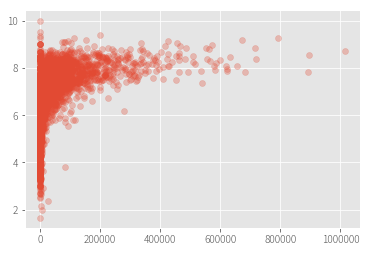

In [2]:
import pandas as pd

anime_master_csv = './anime/anime_master.csv'

# anime_id를 인수 index_col로 지정해서 anime_id를 인덱스에 설정한다. 
df = pd.read_csv(anime_master_csv, index_col='anime_id')
df.head()

# members를 Y값으로 rating을 지정하는 것에 따라 산포도 그래프를 작성할 수 있다. 
# 그려진 기호를 반투명으로 하는 값(alpha=0.5)도 설정되어 있다. 

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(df['members'], df['rating'], alpha=0.3)

plt.show()

# 멤버 수와 평점 사이에 명확한 상관관계는 없지만, 멤버 수의 증가에 따른 평점이 8 부근에 위치되는 경향을 파악할 수 있다.

In [3]:
# 멤버 수 80만 이상 작품

df.loc[df['members']>=800000, ['name', 'members']]

,name,members
anime_id,,
1535,Death Note,1013917
16498,Shingeki no Kyojin,896229
11757,Sword Art Online,893100


In [4]:
# 멤버 수 60만 이상이며 평점이 8.5 이상의 작품

# members와 rating 값으로 데이터를 추린다 .
df.loc[(df['members']>=600000) & (df['rating'] >= 8.5), ['name', 'rating']]

,name,rating
anime_id,,
5114,Fullmetal Alchemist: Brotherhood,9.26
9253,Steins;Gate,9.17
1575,Code Geass: Hangyaku no Lelouch,8.83
1535,Death Note,8.71
16498,Shingeki no Kyojin,8.54


In [5]:
types = df['type'].unique()

In [6]:
types

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA'], dtype=object)

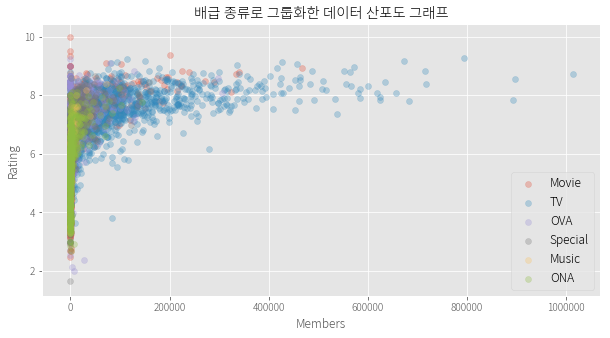

In [7]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)

for t in types:
    x = df.loc[df['type']==t, 'members']
    y = df.loc[df['type']==t, 'rating']
    
    ax.scatter(x, y, alpha = 0.3, label =t)
    
ax.set_title("배급 종류로 그룹화한 데이터 산포도 그래프")    
ax.set_xlabel('Members')
ax.set_ylabel('Rating')

ax.legend(loc ='lower right', fontsize='12')

plt.show()